# Extreme Value Analysis

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Partial Solution</b>
   
The code below is provided to allow you to participate in the interpretation part of the workshop in case you were not able to write your own code to complete the analysis. The missing parts are indicated with a markdown cell contatining "Your interpretation here."
    
This is *not* the full solution, do not use it for studying. It was shared during the workshop.
</p>
</div>

In this workshop, we will complete our Extreme Value Analysis (EVA) to characterize wave loading. Remeber that we were using wave data in the North sea extracted from [ERA5 database](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview) . 

Now, let's go back to our analysis. In the following steps, make use of the code you and your peers prepared home. Remember that we also calculated the value of the return period that it was required for our design, RT = 475 years.

Now, we'll start by importing the packages. Here it is our suggestion, but feel free to add any packages you may need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks
import datetime
%matplotlib inline
from dispersion_index import DI_plot

## EVA using POT + GPD

First, we import the data. Note that you will have to change the name of the file depending on the selected dataset.

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
This workshop uses the same file as in HW2: `Time_Series_DEN_lon_8_lat_56.5_ERA5.txt`
</p>
</div>

In [2]:
pandas = pd.read_csv('Time_Series_DEN_lon_8_lat_56.5_ERA5.txt', delimiter=r"\s+", 
                     names=['date_&_time', 
                            'significant_wave_height_(m)', 
                            'mean_wave_period_(s)', 
                            'Peak_wave_Period_(s)', 
                            'mean_wave_direction_(deg_N)', 
                            '10_meter_wind_speed_(m/s)', 
                            'Wind_direction_(deg_N)'],  # custom header names
                     skiprows=1)  # Skip the initial row (header)


We will change the format of the time stamp and start taking looking how our data looks. Ensure you know what it is in each column of the dataframe.

In [3]:
pandas['date_&_time'] = pd.to_datetime(pandas['date_&_time']-719529, unit='D')

# The value 719529 is the datenum value of the Unix epoch start (1970-01-01), 
# which is the default origin for pd.to_datetime().

pandas.head()

date_&_time  significant_wave_height_(m)  \
0 1950-01-01 00:00:00.000000000                     1.274487   
1 1950-01-01 04:00:00.000026880                     1.338850   
2 1950-01-01 07:59:59.999973120                     1.407454   
3 1950-01-01 12:00:00.000000000                     1.387721   
4 1950-01-01 16:00:00.000026880                     1.660848   

   mean_wave_period_(s)  Peak_wave_Period_(s)  mean_wave_direction_(deg_N)  \
0              4.493986              5.177955                   199.731575   
1              4.609748              5.255064                   214.679306   
2              4.775651              5.390620                   225.182820   
3              4.800286              5.451532                   227.100041   
4              5.112471              5.772289                   244.821975   

   10_meter_wind_speed_(m/s)  Wind_direction_(deg_N)  
0                   8.582743              211.166241  
1                   8.867638              226.280409  
2                   9.423382              230.283209  
3                   9.037646              238.879880  
4                  10.187995              242.554054

We already plotted and performed basic analysis to our data in the previous assignment. Also, we selected the dominant wave direction and filtered the data accordingly. Check the solution notebook for the previous workshop in case of doubt.

5.003667620267622


(0.0, 350.0)

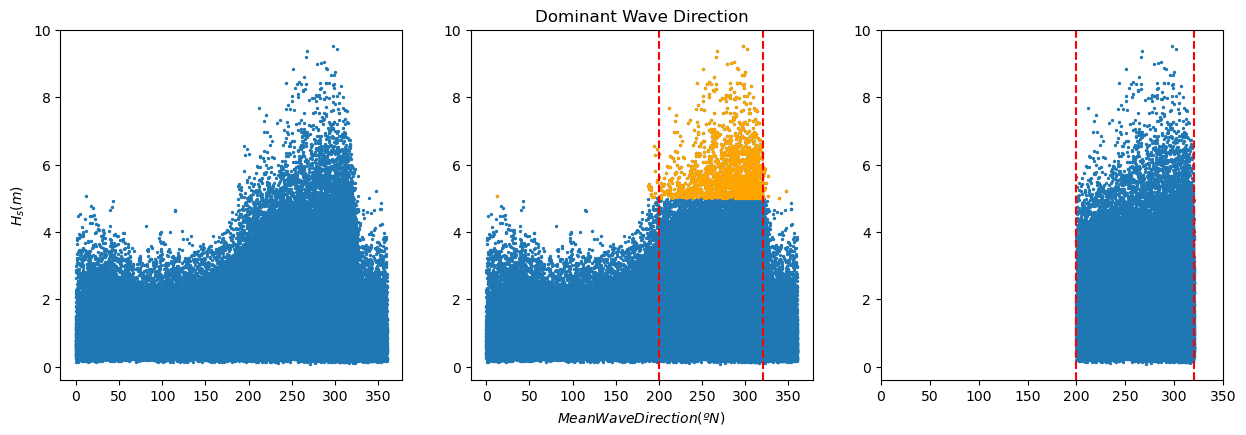

In [4]:
plt.figure(2, figsize = (15,10), facecolor='white')

plt.subplot(2,3,1)
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.ylabel('${H_s (m)}$')

print(pandas['significant_wave_height_(m)'].quantile(0.99))
pandas_99 = pandas[pandas['significant_wave_height_(m)']>=pandas['significant_wave_height_(m)'].quantile(0.99)]

plt.subplot(2,3,2)
plt.title('Dominant Wave Direction')
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.scatter(pandas_99['mean_wave_direction_(deg_N)'], pandas_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlabel('$Mean Wave Direction (ºN)$')


pandas_angle = pandas[(pandas['mean_wave_direction_(deg_N)'].between(200, 320))]

plt.subplot(2,3,3)
plt.scatter(pandas_angle['mean_wave_direction_(deg_N)'], pandas_angle['significant_wave_height_(m)'], s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlim([0, 350])

Note that we stored the filtered data in the dataframe '*pandas_angle*', so that's the one you should use in the subsequent analysis.

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 1:</b>
Apply POT to sample the extreme observations (you should have already done the function as homework!). Plot the results.
    
Use a threshold of 5 meters and a declustering time of 72h.
</p>
</div>

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Here the solutions are provided using PyExtremes package. You are not required to know who to use it, but you should be able to interpret the results of these analysis.
</p>
</div>

In [5]:
#Import packages and prepare your data
from pyextremes import plot_parameter_stability
from pyextremes.plotting import plot_extremes
from pyextremes import EVA
from pyextremes import get_extremes
from pyextremes import plot_threshold_stability
data = pd.DataFrame(
    {'Date-Time (GMT)':pandas_angle['date_&_time'],
     'Significant_wave_height (m)':pandas_angle['significant_wave_height_(m)']
    }).set_index('Date-Time (GMT)')
data = data.squeeze()

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date-Time (GMT)', ylabel='Significant_wave_height (m)'>)

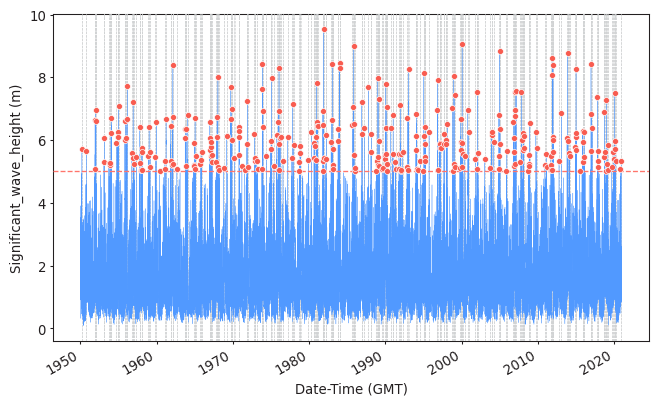

In [6]:
#Extracting the extremes using POT
model = EVA(data=data)
model.get_extremes(
    method="POT",
    extremes_type="high",
    threshold = 5, 
    r = "72H")
#Plotting them
plot_extremes(
    ts=data,
    extremes = model.extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=5,
    r="72H",
)

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 2:</b>
Fit the sampled extremes to fit a Generalized Pareto distribution. Print the shape parameter. What type of GPD are you obtaining?<br>    
<em>Hint: what kind of tail is implied by the parameter value?</em>
</p>
</div>

In [7]:
#Fitting the distribution and printing the fitting features
model.fit_model(
    model = "MLE",
    distribution = "genpareto")
print(model.model)

              MLE model               
--------------------------------------
free parameters: c=-0.159, scale=1.206
fixed parameters: floc=5.000          
AIC: 709.530                          
loglikelihood: -352.747               
return value cache size: 0            
fit parameter cache size: 0           
--------------------------------------


**Your interpretation here.**

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 3:</b>
Assess the goodness of fit of the distribution using a QQplot. Comment about the results of the fitting and compare it to those obtained using BM and GEV. Which one would you choose?
</p>
</div>

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Significant_wave_height (m)'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Significant_wave_height (m)', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

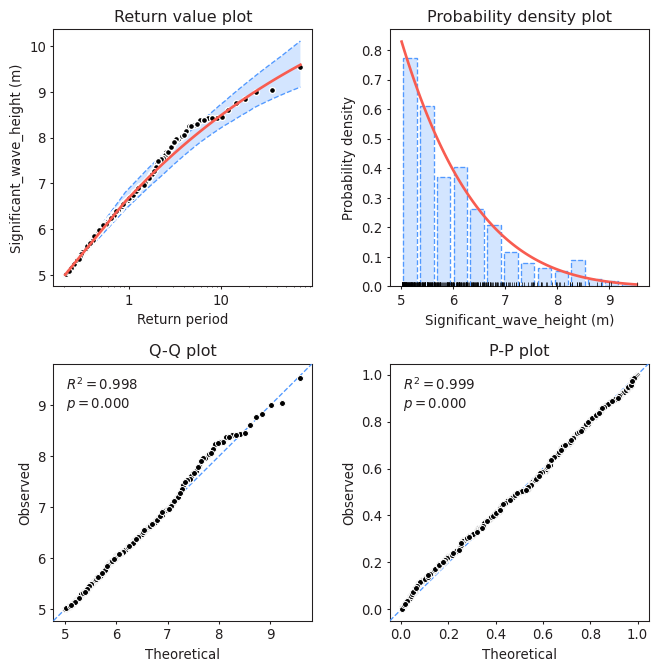

In [9]:
#Assessing goodness of fit
model.plot_diagnostic(alpha=0.95)

**Your interpretation here.**

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 4:</b>
Plot the return level plot and determine the value of the significant wave height that you need for design according to your calculated return period. Remember that return level plot presents in the x-axis the values of the variable (wave height, here) and in the y-axis the corresponding values of the return period. 

Compare it to the results obtained using BM + GEV.
</p>
</div>

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Return period', ylabel='Significant_wave_height (m)'>)

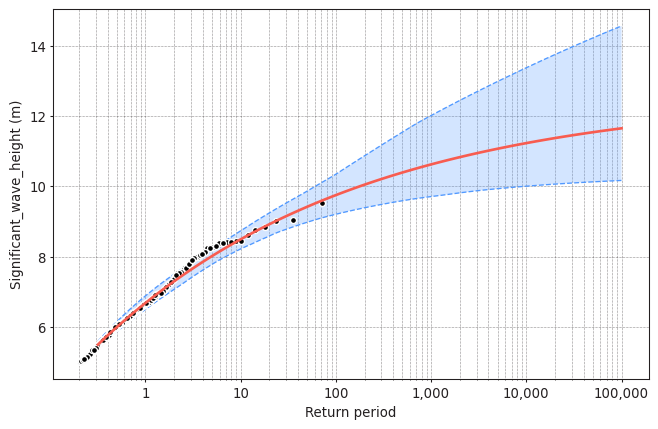

In [11]:
model.plot_return_values(
    return_period=np.logspace(-0.5, 5, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [12]:
design_value = model.get_return_value(
    return_period=475,
    return_period_size="365.2425D",
    alpha = 0.9
)
print(design_value)

(10.374699390221444, 9.687030951678576, 11.148899924949287)


**Your interpretation here.**

We have performed the analysis with a given threshold = 5m and declustering time = 72h. But are they reasonable? 

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 5:</b>
Apply two methods to justify why a threshold=5m and a declustering time=72h are reasonable or not. Write your conclusions.
</p>
</div>

(<AxesSubplot:ylabel='Shape, $\\xi$'>,
 <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>)

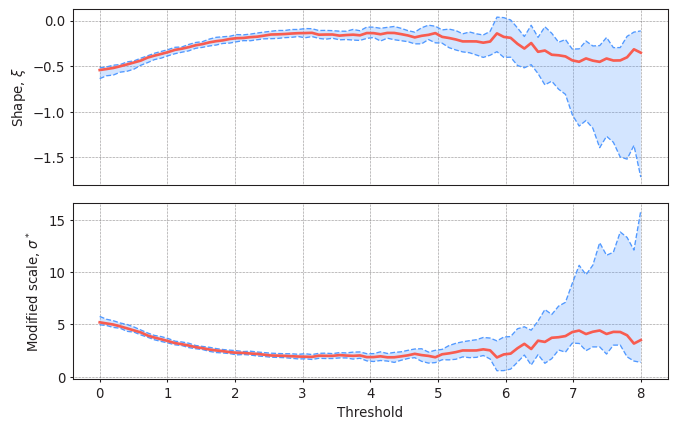

In [14]:
#Plotting the parameter stability plot for a declustering time of 72h
plot_parameter_stability(data, 
                         thresholds = np.linspace(0, 8, 80), 
                         r = "72H",
                         alpha = 0.95)

**Your interpretation here.**

<AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>

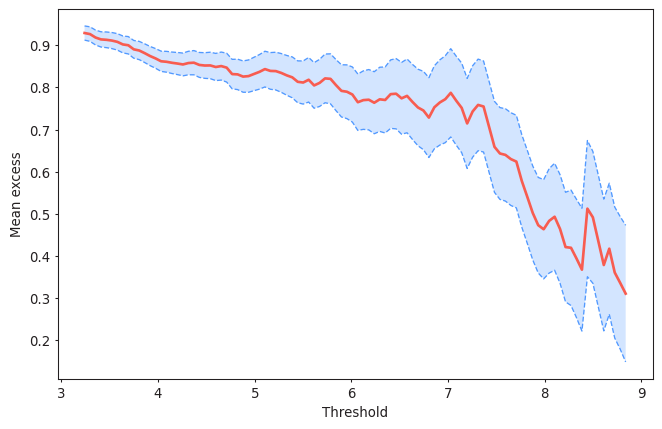

In [15]:
#Plotting the Mean Residual Life plot for a declustering time of 72h 
from pyextremes import plot_mean_residual_life
plot_mean_residual_life(data)

**Your interpretation here.**

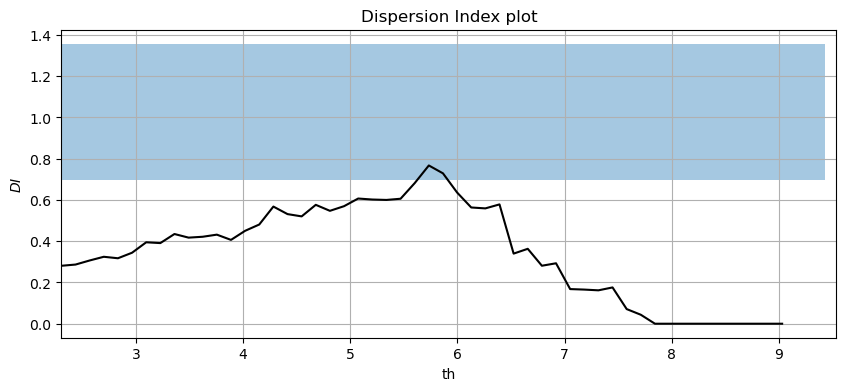

In [16]:
#Plotting the Dispersion Index plot for a declustering time of 72h
#In-house funciton: DI_plot(dates, data, dl, significance)
DI_plot(pandas_angle['significant_wave_height_(m)'], pandas_angle['date_&_time'], 72, 0.05)

**Your interpretation here.**

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Note that there will be some differences between your fitting and that provided by pyExtremes. You have probably defined the declustering time as the time between two extremes (two peaks). PyExtremes defines the declustering time as that between the crossing point over the threshold. The figure below illustrates the diffence.
</p>
</div>

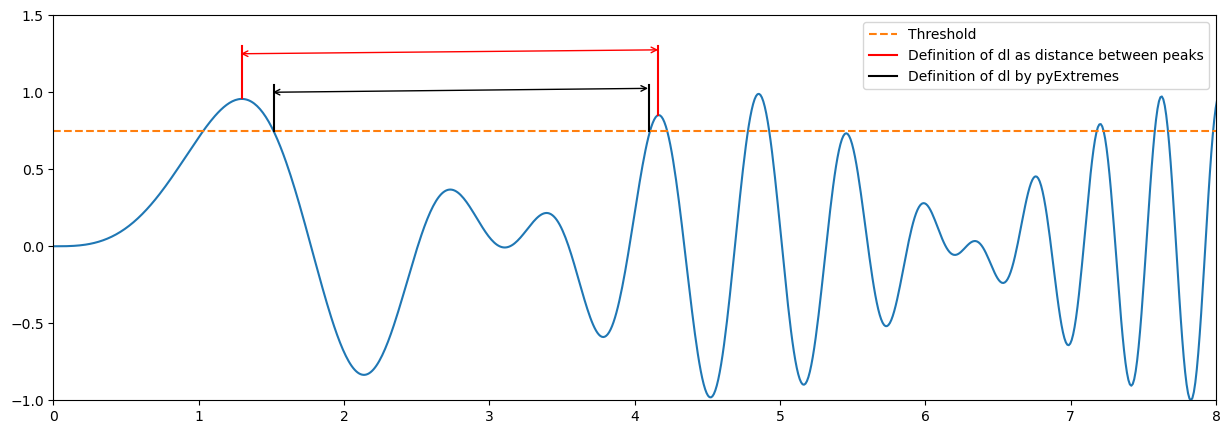

In [17]:
x = np.linspace(0, 10, 1000)
z = np.sin(x**2)
y = z*np.sin(x)

plt.figure(1, figsize = (15,5), facecolor='white')
plt.plot(x, y)
plt.plot([0, 10],[0.75, 0.75], '--', label = 'Threshold')

plt.annotate(' ', xy=(1.27, 1.25), xytext=(4.2, 1.25), arrowprops=dict(arrowstyle='<->', ec = 'r'))
plt.plot([1.3, 1.3],[0.96, 1.3], '-r', label = 'Definition of dl as distance between peaks')
plt.plot([4.16, 4.16],[0.85, 1.3], '-r')
plt.annotate(' ', xy=(1.49, 1), xytext=(4.13, 1), arrowprops=dict(arrowstyle='<->'))
plt.plot([1.52, 1.52],[0.75, 1.05], '-k', label = 'Definition of dl by pyExtremes')
plt.plot([4.1, 4.1],[0.75, 1.05], '-k')
plt.xlim([0, 8])
plt.ylim([-1, 1.5])
plt.legend()

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Based on the above, would you expect more or less sampled extremes using pyExtremes? How would it affect to the calculated lambda?</p>
</div>

**Your interpretation here.**